In [1]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv")

In [2]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [4]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
df["#Passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

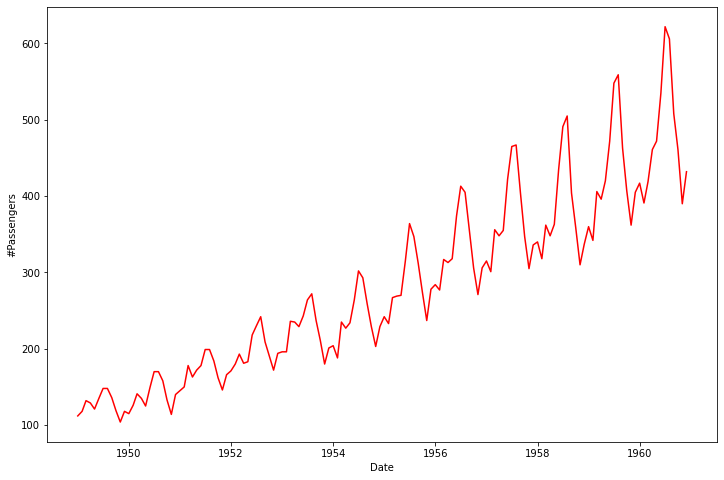

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(df, 'r')
plt.xlabel("Date")
plt.ylabel("#Passengers")
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

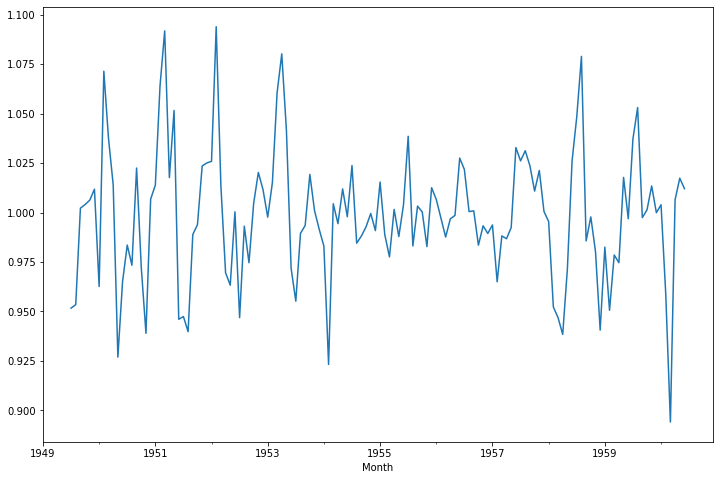

In [9]:
from matplotlib.pyplot import figure
decompose = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
figure(figsize=(12, 8))
decompose.resid.plot()
plt.show()

In [10]:
resid = decompose.resid.dropna()

In [11]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(resid, lags=[5])

,lb_stat,lb_pvalue
5,51.152961,8.046618e-10


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adft = adfuller(df,autolag="AIC")

In [14]:
adft

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

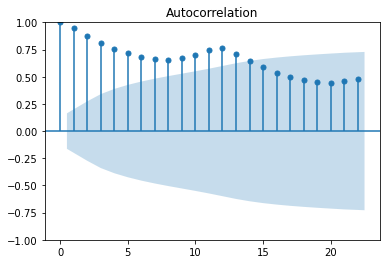

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.show()

In [16]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=2)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.8956753113926396


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


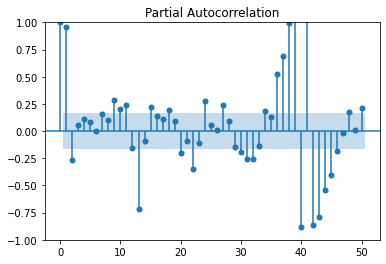

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, lags=50)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7996\658632367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7996\658632367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


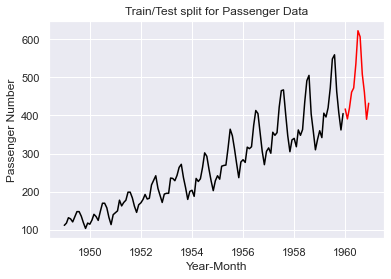

<Figure size 864x576 with 0 Axes>

In [34]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-01", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-01", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
figure(figsize=(12, 8))
sns.set()
plt.show()

In [19]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.16 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.065

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  53.290486084421566


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


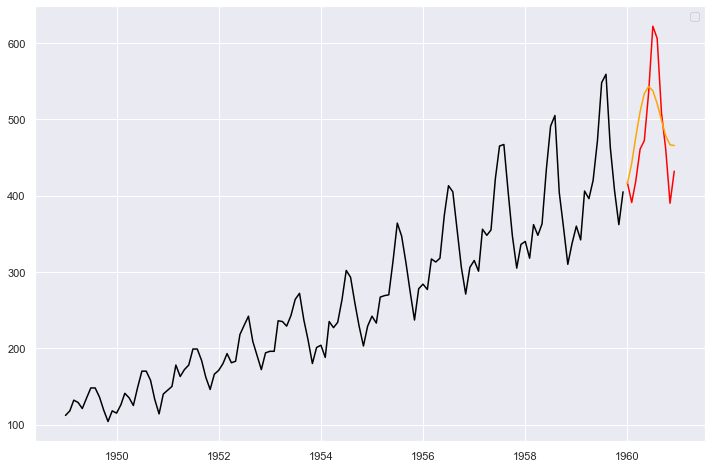

In [21]:
figure(figsize=(12, 8))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "orange")
plt.legend()

In [22]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train, lags=10, period=12, seasonal=True)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: const       -14.365296
s(2,12)       2.009924
s(3,12)      53.730732
s(4,12)       7.559786
s(5,12)      -3.816470
s(6,12)      39.243870
s(7,12)      45.818783
s(8,12)      26.731064
s(9,12)       0.482668
s(10,12)     -1.047035
s(11,12)      6.031744
s(12,12)     38.751266
train.L1      0.949489
train.L2     -0.094303
train.L3     -0.148648
train.L4     -0.096295
train.L5      0.272102
train.L6     -0.143998
train.L7      0.180184
train.L8     -0.364642
train.L9      0.219081
train.L10     0.243568
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [24]:
rmse = sqrt(mean_squared_error(test, predictions))

In [25]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 24.385


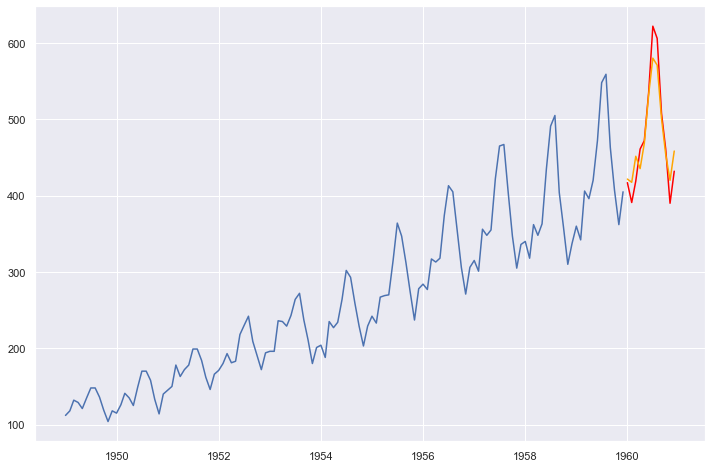

In [33]:
figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test, color="red")
plt.plot(predictions, color='orange')
plt.show()

In [46]:
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)

model = sm.tsa.statespace.SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()

yhat = model_fit.forecast(12)
forecast = pd.DataFrame(yhat,index = test.index,columns=['Prediction'])
rms = sqrt(mean_squared_error(test,yhat))
print("RMSE: ", rms)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE:  21.185658788027975


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
yhat = model_fit.forecast(24)

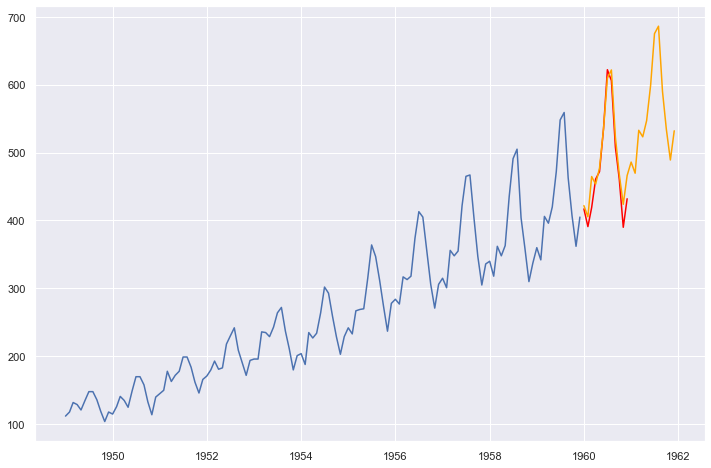

In [49]:
figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test, color="red")
plt.plot(yhat, color='orange')
plt.show()

In [29]:
forecast

,Prediction
Month,
1960-01-01,NaN
1960-02-01,NaN
1960-03-01,NaN
1960-04-01,NaN
1960-05-01,NaN
1960-06-01,NaN
1960-07-01,NaN
1960-08-01,NaN
1960-09-01,NaN
